## 학군관련 피처 추가

In [186]:
#강제 새로고침
import importlib
import base_model_utils
importlib.reload(base_model_utils)
from base_model_utils import set_korean_font, preprocess_base_df, train_compare_models, plot_dealamount_correlation, clean_numeric_df, get_coords


In [187]:
# df_cleaned = preprocess_base_df(df)
# model = train_and_compare_models(df, features = ['excluUseAr', 'floor', 'buildingAge', 'deal_quarter', 'umdNm',
#             'is_high_floor', 'subway_distance', 'isStationNearby'])
# train_and_compare_models(df_cleaned, features)

In [188]:
set_korean_font()

In [189]:
import pandas as pd
base_model_df = pd.read_csv('02_add_subway_df.csv')
df_cleaned = preprocess_base_df(base_model_df)
df = df_cleaned.copy()

In [190]:
df.head(3)

,aptDong,aptNm,buildYear,buyerGbn,cdealDay,cdealType,dealAmount,dealDay,dealMonth,dealYear,...,buildingAge,isHighFloor,dealYearMonth,dealQuarter,estateAgentSggNmClean,aptAddress,isStationNearby,aptLat,aptLng,area_bin
0,306,우장산롯데캐슬,2003,개인,,,110000,29,3,2025,...,22,0,2025-03,1,서울 강서구,서울 강서구 화곡동 1145,0,37.555637,126.848319,60~90
1,,청솔102동,1997,개인,,,56991,17,3,2025,...,28,0,2025-03,1,,내발산동 673-14,0,37.553086,126.841165,90~120
2,,강변,1992,개인,,,73000,29,3,2025,...,33,0,2025-03,1,서울 강서구,서울 강서구 가양동 1475,1,37.565216,126.855668,30~60


In [127]:
import requests
import xml.etree.ElementTree as ET
import pandas as pd
import os
from dotenv import load_dotenv

load_dotenv()
NEIS_KEY = os.getenv("NEIS_KEY")
def fetch_school_list(pIndex=1, pSize=1000):
    url = "https://open.neis.go.kr/hub/schoolInfo"
    params = {
        "KEY": NEIS_KEY,
        "Type": "json",
        "pIndex": pIndex,
        "pSize": pSize
    }
    res = requests.get(url, params=params)
    data = res.json()
    schoolData = data['schoolInfo'][1]['row']
    df_school = pd.json_normalize(schoolData)
    return df_school

# 예: 첫 페이지 데이터
df_school = fetch_school_list()


In [147]:
import requests
import pandas as pd
import os
from dotenv import load_dotenv

load_dotenv()
NEIS_KEY = os.getenv("NEIS_KEY")

def fetch_all_school_data():
    all_rows = []
    pIndex = 1
    pSize = 1000  # 최대 페이지 크기
    
    while True:
        url = "https://open.neis.go.kr/hub/schoolInfo"
        params = {
            "KEY": NEIS_KEY,
            "Type": "json",
            "pIndex": pIndex,
            "pSize": pSize
        }
        res = requests.get(url, params=params)
        if res.status_code != 200:
            print(f"요청 실패 (pIndex={pIndex}):", res.status_code)
            break

        data = res.json()
        try:
            schoolData = data['schoolInfo'][1]['row']
            all_rows.extend(schoolData)
            print(f"{pIndex}페이지 수집 완료 ({len(schoolData)}개)")
        except Exception as e:
            print(f"마지막 페이지 도달 또는 오류 발생 (pIndex={pIndex}): {e}")
            break
        
        pIndex += 1  # 다음 페이지 요청

    df_all_school = pd.json_normalize(all_rows)
    return df_all_school

# 실행 및 확인
df_school = fetch_all_school_data()
print(f"전체 수집된 학교 수: {len(df_school)}개")


1페이지 수집 완료 (1000개)
2페이지 수집 완료 (1000개)
3페이지 수집 완료 (1000개)
4페이지 수집 완료 (1000개)
5페이지 수집 완료 (1000개)
6페이지 수집 완료 (1000개)
7페이지 수집 완료 (1000개)
8페이지 수집 완료 (1000개)
9페이지 수집 완료 (1000개)
10페이지 수집 완료 (1000개)
11페이지 수집 완료 (1000개)
12페이지 수집 완료 (1000개)
13페이지 수집 완료 (579개)
마지막 페이지 도달 또는 오류 발생 (pIndex=14): 'schoolInfo'
전체 수집된 학교 수: 12579개


In [156]:
# 데이터 전처리 - 서울특별시 초/중학교만 
df_school_target = df_school[
    (df_school['LCTN_SC_NM'] == '서울특별시') &
    (df_school['SCHUL_KND_SC_NM'].isin(['초등학교', '중학교']))
].copy()

print(f"최종 대상 학교 수: {len(df_school_target)}개")

최종 대상 학교 수: 1000개


In [157]:
df_school_target.head(3)

,ATPT_OFCDC_SC_CODE,ATPT_OFCDC_SC_NM,SD_SCHUL_CODE,SCHUL_NM,ENG_SCHUL_NM,SCHUL_KND_SC_NM,LCTN_SC_NM,JU_ORG_NM,FOND_SC_NM,ORG_RDNZC,...,ORG_FAXNO,HS_SC_NM,INDST_SPECL_CCCCL_EXST_YN,HS_GNRL_BUSNS_SC_NM,SPCLY_PURPS_HS_ORD_NM,ENE_BFE_SEHF_SC_NM,DGHT_SC_NM,FOND_YMD,FOAS_MEMRD,LOAD_DTM
1,B10,서울특별시교육청,7130165,가락중학교,Karak Middle School,중학교,서울특별시,서울특별시강동송파교육지원청,공립,05673,...,02-2143-3119,,N,일반계,None,전기,주간,19860129,19860506,20230615
2,B10,서울특별시교육청,7041164,가산중학교,Gasan Middle School,중학교,서울특별시,서울특별시남부교육지원청,공립,08584,...,02-892-8477,,N,일반계,None,전기,주간,19700810,19710303,20230615
3,B10,서울특별시교육청,7130166,가원중학교,Gawon Middle School,중학교,서울특별시,서울특별시강동송파교육지원청,공립,05831,...,02-443-5825,,N,일반계,None,전기,주간,19881224,19881224,20230615


In [158]:
# !pip install tqdm

In [159]:
print(f" 학군데이터 결측치  개수 : {df_school_target.isna().sum()}")
print(f" 실거래+역세권 데이터 결측치  개수 : {df.isna().sum()}")


 학군데이터 결측치  개수 : ATPT_OFCDC_SC_CODE              0
ATPT_OFCDC_SC_NM                0
SD_SCHUL_CODE                   0
SCHUL_NM                        0
ENG_SCHUL_NM                    0
SCHUL_KND_SC_NM                 0
LCTN_SC_NM                      0
JU_ORG_NM                       0
FOND_SC_NM                      0
ORG_RDNZC                       0
ORG_RDNMA                       0
ORG_RDNDA                       0
ORG_TELNO                       0
HMPG_ADRES                      0
COEDU_SC_NM                     0
ORG_FAXNO                       1
HS_SC_NM                      572
INDST_SPECL_CCCCL_EXST_YN       0
HS_GNRL_BUSNS_SC_NM            20
SPCLY_PURPS_HS_ORD_NM        1000
ENE_BFE_SEHF_SC_NM              0
DGHT_SC_NM                      0
FOND_YMD                        0
FOAS_MEMRD                      0
LOAD_DTM                        0
dtype: int64
 실거래+역세권 데이터 결측치  개수 : aptDong                  0
aptNm                    0
buildYear                0
buyerGbn        

In [160]:
# df_school_target = df_school_target.dropna(subset=[])
df = df.dropna(subset=['aptLat', 'aptLng', 'area_bin'])

In [161]:
print(f" 학군데이터 결측치  개수 : {df_school_target.isna().sum()}")
print(f" 실거래+역세권 데이터 결측치  개수 : {df.isna().sum()}")

 학군데이터 결측치  개수 : ATPT_OFCDC_SC_CODE              0
ATPT_OFCDC_SC_NM                0
SD_SCHUL_CODE                   0
SCHUL_NM                        0
ENG_SCHUL_NM                    0
SCHUL_KND_SC_NM                 0
LCTN_SC_NM                      0
JU_ORG_NM                       0
FOND_SC_NM                      0
ORG_RDNZC                       0
ORG_RDNMA                       0
ORG_RDNDA                       0
ORG_TELNO                       0
HMPG_ADRES                      0
COEDU_SC_NM                     0
ORG_FAXNO                       1
HS_SC_NM                      572
INDST_SPECL_CCCCL_EXST_YN       0
HS_GNRL_BUSNS_SC_NM            20
SPCLY_PURPS_HS_ORD_NM        1000
ENE_BFE_SEHF_SC_NM              0
DGHT_SC_NM                      0
FOND_YMD                        0
FOAS_MEMRD                      0
LOAD_DTM                        0
dtype: int64
 실거래+역세권 데이터 결측치  개수 : aptDong                  0
aptNm                    0
buildYear                0
buyerGbn        

In [162]:
# 학교 주소로 위도/경도 추출해서 df_school에 추가
from tqdm import tqdm
import time
addresses = df_school_target["ORG_RDNMA"].dropna()
school_lat = []
school_lng = []

for addr in tqdm(df_school_target["ORG_RDNMA"], total=len(df_school_target)):
    coords = get_coords(addr)
    if coords:
        lat, lng = coords
    else:
        lat, lng = (None, None)
    school_lat.append(lat)
    school_lng.append(lng)
    time.sleep(1)  # 카카오 API rate limit 방지

# 위경도 컬럼 추가
df_school_target["SC_LAT"] = school_lat
df_school_target["SC_LNG"] = school_lng




100%|███████████████████████████████████████| 1000/1000 [18:04<00:00,  1.08s/it]


In [163]:
df_school_target.columns

Index(['ATPT_OFCDC_SC_CODE', 'ATPT_OFCDC_SC_NM', 'SD_SCHUL_CODE', 'SCHUL_NM',
       'ENG_SCHUL_NM', 'SCHUL_KND_SC_NM', 'LCTN_SC_NM', 'JU_ORG_NM',
       'FOND_SC_NM', 'ORG_RDNZC', 'ORG_RDNMA', 'ORG_RDNDA', 'ORG_TELNO',
       'HMPG_ADRES', 'COEDU_SC_NM', 'ORG_FAXNO', 'HS_SC_NM',
       'INDST_SPECL_CCCCL_EXST_YN', 'HS_GNRL_BUSNS_SC_NM',
       'SPCLY_PURPS_HS_ORD_NM', 'ENE_BFE_SEHF_SC_NM', 'DGHT_SC_NM', 'FOND_YMD',
       'FOAS_MEMRD', 'LOAD_DTM', 'SC_LAT', 'SC_LNG'],
      dtype='object')

In [164]:
print(f" 학군데이터 결측치  개수 : {df_school_target.isna().sum()}")
print(f" 실거래+역세권 데이터 결측치  개수 : {df.isna().sum()}")


 학군데이터 결측치  개수 : ATPT_OFCDC_SC_CODE              0
ATPT_OFCDC_SC_NM                0
SD_SCHUL_CODE                   0
SCHUL_NM                        0
ENG_SCHUL_NM                    0
SCHUL_KND_SC_NM                 0
LCTN_SC_NM                      0
JU_ORG_NM                       0
FOND_SC_NM                      0
ORG_RDNZC                       0
ORG_RDNMA                       0
ORG_RDNDA                       0
ORG_TELNO                       0
HMPG_ADRES                      0
COEDU_SC_NM                     0
ORG_FAXNO                       1
HS_SC_NM                      572
INDST_SPECL_CCCCL_EXST_YN       0
HS_GNRL_BUSNS_SC_NM            20
SPCLY_PURPS_HS_ORD_NM        1000
ENE_BFE_SEHF_SC_NM              0
DGHT_SC_NM                      0
FOND_YMD                        0
FOAS_MEMRD                      0
LOAD_DTM                        0
SC_LAT                          4
SC_LNG                          4
dtype: int64
 실거래+역세권 데이터 결측치  개수 : aptDong                  0
ap

In [165]:
df_school_target = df_school_target.dropna(subset=["SC_LAT", "SC_LNG"])
df = df.dropna(subset=["aptLat", "aptLng"])

In [166]:
df_school_target.isna().sum()

ATPT_OFCDC_SC_CODE             0
ATPT_OFCDC_SC_NM               0
SD_SCHUL_CODE                  0
SCHUL_NM                       0
ENG_SCHUL_NM                   0
SCHUL_KND_SC_NM                0
LCTN_SC_NM                     0
JU_ORG_NM                      0
FOND_SC_NM                     0
ORG_RDNZC                      0
ORG_RDNMA                      0
ORG_RDNDA                      0
ORG_TELNO                      0
HMPG_ADRES                     0
COEDU_SC_NM                    0
ORG_FAXNO                      1
HS_SC_NM                     571
INDST_SPECL_CCCCL_EXST_YN      0
HS_GNRL_BUSNS_SC_NM           20
SPCLY_PURPS_HS_ORD_NM        996
ENE_BFE_SEHF_SC_NM             0
DGHT_SC_NM                     0
FOND_YMD                       0
FOAS_MEMRD                     0
LOAD_DTM                       0
SC_LAT                         0
SC_LNG                         0
dtype: int64

In [105]:
df.isna().sum()

aptDong                  0
aptNm                    0
buildYear                0
buyerGbn                 0
cdealDay                 0
cdealType                0
dealAmount               0
dealDay                  0
dealMonth                0
dealYear                 0
dealingGbn               0
estateAgentSggNm         0
excluUseAr               0
floor                    0
jibun                    0
landLeaseholdGbn         0
rgstDate                 0
sggCd                    0
slerGbn                  0
umdNm                    0
buildingAge              0
isHighFloor              0
dealYearMonth            0
dealQuarter              0
estateAgentSggNmClean    0
aptAddress               0
isStationNearby          0
aptLat                   0
aptLng                   0
area_bin                 3
dtype: int64

In [167]:
from geopy.distance import geodesic
import numpy as np

# 학군 프리미엄 여부만 계산하는 간단한 함수
def has_school_premium(lat, lng, school_df, distance_limit=500):
    for school_type in ["초등학교", "중학교"]:
        filtered = school_df[school_df["SCHUL_KND_SC_NM"] == school_type]

        for _, row in filtered.iterrows():
            school_lat = row["SC_LAT"][0] if isinstance(row["SC_LAT"], list) else row["SC_LAT"]
            school_lng = row["SC_LNG"][0] if isinstance(row["SC_LNG"], list) else row["SC_LNG"]

            if pd.notnull(school_lat) and pd.notnull(school_lng):
                dist = geodesic((lat, lng), (school_lat, school_lng)).meters
                if dist <= distance_limit:
                    return True  # 학군 프리미엄 있음
    return False  # 두 학교 다 거리 밖

# 전체 아파트에 대해 학군 프리미엄 여부 계산
school_premium_flags = []

for _, row in df.iterrows():
    lat = row["aptLat"]
    lng = row["aptLng"]

    if pd.notnull(lat) and pd.notnull(lng):
        has_premium = has_school_premium(lat, lng, df_school_target)
    else:
        has_premium = False  # 좌표 없는 경우 False 처리

    school_premium_flags.append(has_premium)



In [168]:
# 학군 프리미엄 여부 추가 (500m이내는 학군 프리미엄)
df['isSchoolPremium'] = school_premium_flags
df['isSchoolPremium'] = df['isSchoolPremium'].astype(int)

In [108]:
# from geopy.distance import geodesic
# import numpy as np

# # 아파트와 학교 거리 계산 함수
# def find_nearest_school_distance(lat, lng, school_df, school_type):
#     filtered = df_school_target[df_school_target["SCHUL_KND_SC_NM"] == school_type]
#     min_dist = np.inf
#     nearest_school = None
    
#     for _, row in filtered.iterrows():
#         school_lat = row["SC_LAT"][0] if isinstance(row["SC_LAT"], list) else row["SC_LAT"]
#         school_lng = row["SC_LNG"][0] if isinstance(row["SC_LNG"], list) else row["SC_LNG"]

#         if pd.notnull(school_lat) and pd.notnull(school_lng):
#             dist = geodesic((lat, lng), (school_lat, school_lng)).meters
            
#             if dist < min_dist:
#                 min_dist = dist
#                 nearest_school = row["SCHUL_NM"]
    
#     return min_dist, nearest_school
    
# # 초등학교와 중학교 거리 계산
# apt_to_elementary = []
# apt_to_middle = []

# for _, row in df.iterrows():
#     lat = row["aptLat"]
#     lng = row["aptLng"]

#     # 초등학교 거리 및 이름
#     dist_e, name_e = find_nearest_school_distance(lat, lng, df_school_target, "초등학교")
#     apt_to_elementary.append((dist_e, name_e))

#     # 중학교 거리 및 이름
#     dist_m, name_m = find_nearest_school_distance(lat, lng, df_school_target, "중학교")
#     apt_to_middle.append((dist_m, name_m))
    
# # 초 중학교 이름 및 거리 컬럼 추가
# df["nearestElementaryDistance"] = [x[0] for x in apt_to_elementary]
# df["nearestElementaryName"] = [x[1] for x in apt_to_elementary]
# df["nearestMiddleDistance"] = [x[0] for x in apt_to_middle]
# df["nearestMiddleName"] = [x[1] for x in apt_to_middle]

# # None (NaN) 값을 2501m로 대체 → 2.5km 이상 떨어진 경우 의미
# df['nearestElementaryDistance'] = df['nearestElementaryDistance'].fillna(2501)
# df['nearestMiddleDistance'] = df['nearestMiddleDistance'].fillna(2501)

# #학군 프리미엄 여부 추가 (500m이내는 학군 프리미엄)
# df['isSchoolPremium'] = np.where(
#     (df['nearestElementaryDistance'] <= 1000) | (df['nearestMiddleDistance'] <= 1000),
#     True, False)

In [109]:
# find_nearest_school_distance(df['aptLat'][0], df['aptLng'][0], df_school, "초등학교")
# # find_nearest_school_distance(df['aptLat'][0], df['aptLng'][0], df_school, "중학교")

(488.6887008828377, '서울등원초등학교')

In [169]:
df.isna().sum()

aptDong                  0
aptNm                    0
buildYear                0
buyerGbn                 0
cdealDay                 0
cdealType                0
dealAmount               0
dealDay                  0
dealMonth                0
dealYear                 0
dealingGbn               0
estateAgentSggNm         0
excluUseAr               0
floor                    0
jibun                    0
landLeaseholdGbn         0
rgstDate                 0
sggCd                    0
slerGbn                  0
umdNm                    0
buildingAge              0
isHighFloor              0
dealYearMonth            0
dealQuarter              0
estateAgentSggNmClean    0
aptAddress               0
isStationNearby          0
aptLat                   0
aptLng                   0
area_bin                 0
isSchoolPremium          0
dtype: int64

In [170]:
df.columns

Index(['aptDong', 'aptNm', 'buildYear', 'buyerGbn', 'cdealDay', 'cdealType',
       'dealAmount', 'dealDay', 'dealMonth', 'dealYear', 'dealingGbn',
       'estateAgentSggNm', 'excluUseAr', 'floor', 'jibun', 'landLeaseholdGbn',
       'rgstDate', 'sggCd', 'slerGbn', 'umdNm', 'buildingAge', 'isHighFloor',
       'dealYearMonth', 'dealQuarter', 'estateAgentSggNmClean', 'aptAddress',
       'isStationNearby', 'aptLat', 'aptLng', 'area_bin', 'isSchoolPremium'],
      dtype='object')

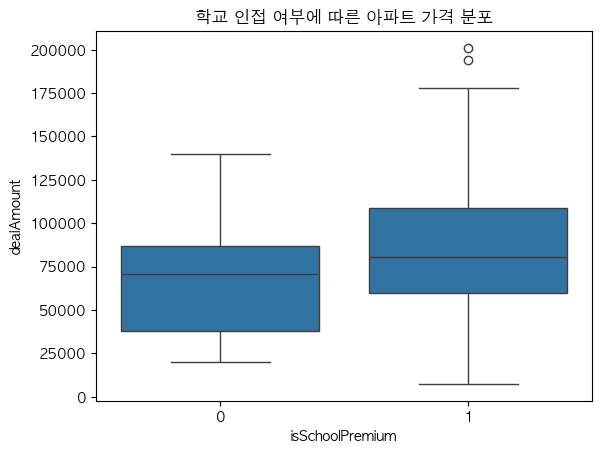

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt

# 박스플롯: 학교 여부별 거래금액
sns.boxplot(x='isSchoolPremium', y='dealAmount', data=df)
plt.title('학교 인접 여부에 따른 아파트 가격 분포')
plt.show()


In [172]:
# 지하철 여부별 평균, 중앙값
price_by_school = df.groupby('isSchoolPremium')['dealAmount'].agg(['mean', 'median', 'count'])
print(price_by_school)


                         mean   median  count
isSchoolPremium                              
0                65605.263158  71000.0     19
1                84701.288095  80500.0    420


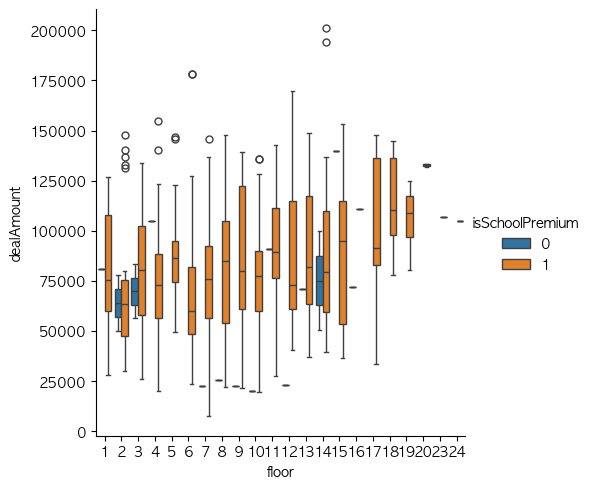

In [173]:
#지하철 여부 + 층수 = 가격 변화
sns.catplot(x='floor', y='dealAmount', hue='isSchoolPremium', data=df, kind='box')


<Axes: xlabel='area_bin', ylabel='dealAmount'>

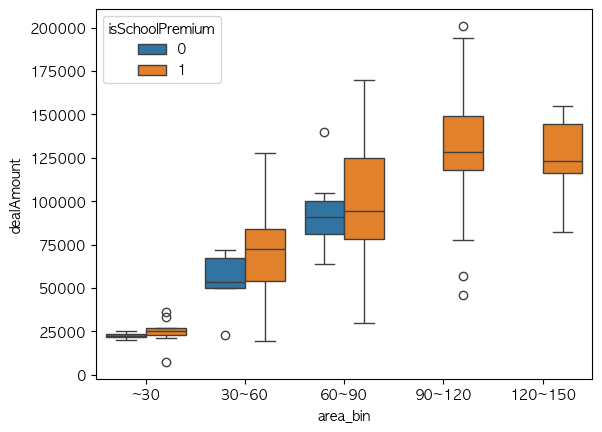

In [174]:
# 지하철 여부 + 전용면적 구간화
df['area_bin'] = pd.cut(df['excluUseAr'], bins=[0, 30, 60, 90, 120, 150], labels=['~30', '30~60', '60~90', '90~120', '120~150'])
sns.boxplot(x='area_bin', y='dealAmount', hue='isSchoolPremium', data=df)


In [176]:
features = ['excluUseAr', 'floor', 'buildingAge', 'umdNm',
            'isHighFloor', 'isStationNearby', 'isSchoolPremium', '']
train_compare_models(df, features)

LinearRegression → MAE: 13207.54, R²: 0.7548
RandomForest → MAE: 5502.06, R²: 0.9214
XGBoost → MAE: 4766.88, R²: 0.9260
LightGBM → MAE: 5077.21, R²: 0.9293


(              Model           MAE        R2
 0  LinearRegression  13207.537295  0.754780
 1      RandomForest   5502.060646  0.921412
 2           XGBoost   4766.879883  0.925958
 3          LightGBM   5077.213906  0.929306,
 {'LinearRegression': LinearRegression(),
  'RandomForest': RandomForestRegressor(random_state=42),
  'XGBoost': XGBRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_stra

In [177]:
df.dtypes

aptDong                    object
aptNm                      object
buildYear                   int64
buyerGbn                   object
cdealDay                   object
cdealType                  object
dealAmount                  int64
dealDay                     int64
dealMonth                   int64
dealYear                    int64
dealingGbn                 object
estateAgentSggNm           object
excluUseAr                float64
floor                       int64
jibun                      object
landLeaseholdGbn           object
rgstDate                   object
sggCd                       int64
slerGbn                    object
umdNm                      object
buildingAge                 int64
isHighFloor                 int64
dealYearMonth              object
dealQuarter                 int64
estateAgentSggNmClean      object
aptAddress                 object
isStationNearby             int64
aptLat                    float64
aptLng                    float64
area_bin      

In [178]:
df_numeric = clean_numeric_df(df)
df_numeric.head(3)

,dealAmount,excluUseAr,floor,buildingAge,dealQuarter,isStationNearby,isHighFloor,isSchoolPremium
0,110000,85.00,14,22,1,0,0,1
1,56991,117.69,7,28,1,0,0,1
2,73000,49.50,4,33,1,1,0,1


In [179]:
# 상관관계 계산 전에 dealQuarter 제거
df_numeric = df_numeric.drop(columns = ['dealQuarter'])

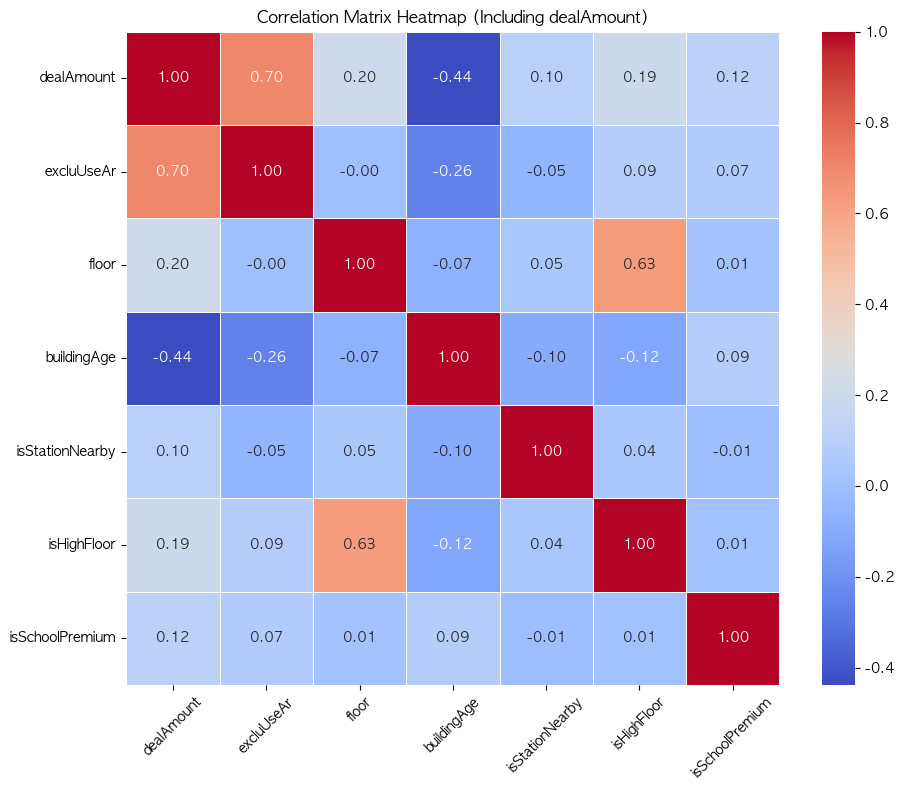

dealAmount         1.000000
excluUseAr         0.696780
floor              0.204114
isHighFloor        0.193749
isSchoolPremium    0.115308
isStationNearby    0.103165
buildingAge       -0.438616
Name: dealAmount, dtype: float64


In [180]:
plot_dealamount_correlation(df_numeric)

먼저 df['isSchoolPriemium']의 컬럼만 넣어서 모델을 돌렸는데 대략 MAE는4700~5000만원의 오차가 나왔다.살짝 애매하긴 한것 같다. \
R2값은 0.9이상으로 괜찮은 값이 나온 것 같다. \
학군여부 컬럼 또한 상관관계에서는 영향이 미미 했지만 학군여부 컬럼을 넣어 모델을 돌린결과 \
더 괜찮은 성능을 보였으므로 다른 컬럼에 좋은 영향을 미치는 것 같다. \
이후에는 초/중학교의 거리 컬럼을 추가해서 비교해 보려고한다.

In [183]:
# LightGBM 과적합 여부 판단
from sklearn.metrics import mean_absolute_error, r2_score
# 모델 학습
result_df, models, X_train, X_valid, y_train, y_valid = train_compare_models(df, features)

# LightGBM 모델 성능 확인
model = models['LightGBM']
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_valid = mean_absolute_error(y_valid, y_valid_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_valid = r2_score(y_valid, y_valid_pred)

print(f"[TRAIN] MAE: {mae_train:.2f}, R²: {r2_train:.4f}")
print(f"[VALID] MAE: {mae_valid:.2f}, R²: {r2_valid:.4f}")


LinearRegression → MAE: 13207.54, R²: 0.7548
RandomForest → MAE: 5502.06, R²: 0.9214
XGBoost → MAE: 4766.88, R²: 0.9260
LightGBM → MAE: 5077.21, R²: 0.9293
[TRAIN] MAE: 1386.66, R²: 0.9961
[VALID] MAE: 5077.21, R²: 0.9293


실제데이터와 예측데이터를 비교해본 결과 \
R2 값은 valid_data가 0.9 이상이므로 이정도면 인용이 가능해보임 \
MAE값은 valid_data와 train_data가 4배 가량 차이가 나고 dealAmount 단위가 만원단위기 때문에 \
5077만원의 오차가 있다는 것이다. 예측력은 나쁘지 않지만 오차가 크다고 판단되어 \
학군 거리 데이터를 추가적으로 피처엔지니어링 하려고한다.

In [185]:
from base_model_utils import preprocess_base_df
df = preprocess_base_df(df)
df.to_csv('03_add_school_df.csv', index=False)